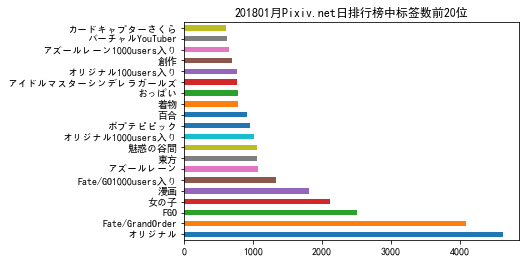

In [32]:
import os
import json
import numpy as np
import pandas as pd
from pylab import *

mpl.rcParams['font.sans-serif'] = ['SimHei']  # 将字体设置为黑体，防止画图时出现乱码（我也不知道为什么用黑体，能显示日文）

data_dir = 'C:/Users/san33/Work/Data/SanMu_1536367199_PixivSpider_daily_date/PixivSpider_daily_date/PixivSpider_data'
month = '201801'

# 获取需要解析的json数据文件名
def get_dir_list(data_dir=data_dir, date_str=month):
    temp = 'daily_rank_' + date_str
    return [filename for filename in os.listdir(data_dir) if filename.startswith(temp) and filename.endswith('.json')]


dir_list = get_dir_list()


# 获取基本的数据，tags不获取，获取之后是一个列表，暂时不知道如何把该列如何原地展开，所以下面会再加载一次数据，使用merge合并
def get_base_data(dir_list, keys=['illust_id', 'rating_count', 'user_id', 'illust_upload_timestamp', 'user_name', 'width', 'height', 'title']):
    sum_list = []
    for item in dir_list:
        with open(os.path.join(data_dir, item)) as f:
            data = json.load(f)['contents']
        frame = pd.DataFrame(data, columns=keys)
        sum_list.append(frame)
    return sum_list


temp = get_base_data(dir_list)
pixiv_base_data = pd.concat(temp, ignore_index=True)  # 合并数据

pixiv_base_data.set_index('illust_id')  # 列变行


# 获取tag数据，可以上面函数合并，降低资源消耗
def get_tag_data(dir_list):
    sum_list = []
    for item in dir_list:
        with open(os.path.join(data_dir, item)) as f:
            data = json.load(f)['contents']
        for temp in data:
            frame = pd.DataFrame(temp['tags'], columns=['tags'])
            frame['illust_id'] = temp['illust_id']
            sum_list.append(frame)
    return sum_list


tag_data = pd.concat(get_tag_data(dir_list)).set_index('illust_id')

merge_data = pd.merge(pixiv_base_data, tag_data, on='illust_id')  # 将两个DataFrame merge成一个，可以选择merge方式

# merge_data.sort_values('rating_count', ascending=False)

merge_data['tags'].value_counts()[:20].plot(kind='barh', title='{}月Pixiv.net日排行榜中标签数前20位'.format(month))  # 画图

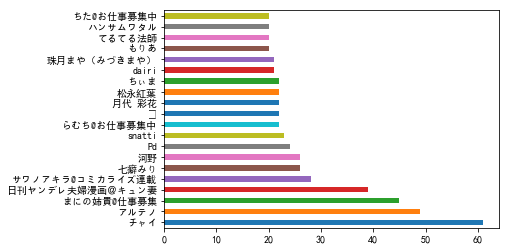

In [14]:
pixiv_base_data['user_name'].value_counts()[:20].plot(kind='barh')

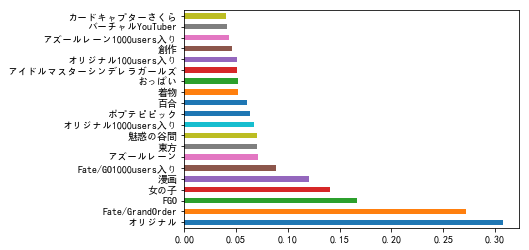

In [29]:
merge_data['tags'].value_counts()[:20].div(len(pixiv_base_data.index)).plot(kind='barh')